In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
df=pd.read_csv("data.csv")
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [ ]:
df = df.rename(columns={'HiringDecision': 'Label'})  

# Encode categorical
categorical = ['EducationLevel', 'RecruitmentStrategy']
df = pd.get_dummies(df, columns=categorical, drop_first=True)

# Scale numeric features
numerical = ['Age', 'ExperienceYears', 'PreviousCompanies',
             'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
male = df[df['Gender'] == 1]
female = df[df['Gender'] == 0]

train_df= pd.concat([
    male.sample(frac=0.8, random_state=42),
    female.sample(frac=0.2, random_state=42)
])
test_df = df.drop(train_df.index)

print("Training set gender distribution:\n", train_df['Gender'].value_counts())
print("Testing set gender distribution:\n", test_df['Gender'].value_counts())

Training set gender distribution:
 Gender
1    590
0    152
Name: count, dtype: int64
Testing set gender distribution:
 Gender
0    610
1    148
Name: count, dtype: int64


In [15]:
X_train = train_df.drop(columns=['Label'])
y_train = train_df['Label']
X_test = test_df.drop(columns=['Label'])
y_test = test_df['Label']

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8733509234828496
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       518
           1       0.81      0.78      0.80       240

    accuracy                           0.87       758
   macro avg       0.86      0.85      0.85       758
weighted avg       0.87      0.87      0.87       758



In [17]:

test_df = test_df.copy()
test_df['y_true'] = y_test
test_df['y_pred'] = y_pred

male = test_df[test_df['Gender'] == 1]
female = test_df[test_df['Gender'] == 0]

def metrics_for_group(group):
    tn, fp, fn, tp = confusion_matrix(group['y_true'], group['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    pp = (tp + fp) / len(group) 
    return tpr, fpr, pp

tpr_male, fpr_male, pp_male = metrics_for_group(male)
tpr_female, fpr_female, pp_female = metrics_for_group(female)

print("Fairness Metrics")
print(f"Demographic Parity (M vs F): {pp_male:.3f} vs {pp_female:.3f}")
print(f"Equal Opportunity (TPR): {tpr_male:.3f} vs {tpr_female:.3f}")
print(f"Average Odds Difference: {(abs(tpr_male - tpr_female) + abs(fpr_male - fpr_female)) / 2:.3f}")


Fairness Metrics
Demographic Parity (M vs F): 0.304 vs 0.303
Equal Opportunity (TPR): 0.826 vs 0.768
Average Odds Difference: 0.038


c:\Users\alska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 Explanation for index 1:
  0.00 < RecruitmentStrategy_2 <= 1.00: -0.469
  RecruitmentStrategy_3 <= 0.00: 0.292
  EducationLevel_4 > 0.00: 0.249
  EducationLevel_3 <= 0.00: -0.227
  PersonalityScore > 0.94: 0.124


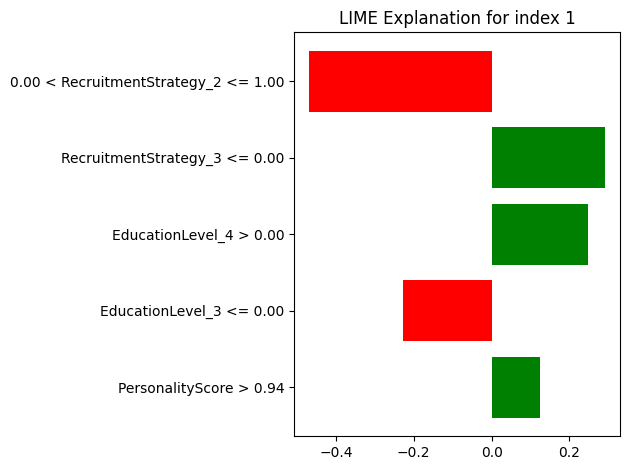

c:\Users\alska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 Explanation for index 11:
  0.00 < RecruitmentStrategy_2 <= 1.00: -0.469
  RecruitmentStrategy_3 <= 0.00: 0.283
  EducationLevel_4 <= 0.00: -0.250
  EducationLevel_3 > 0.00: 0.241
  -0.00 < SkillScore <= 0.81: 0.058


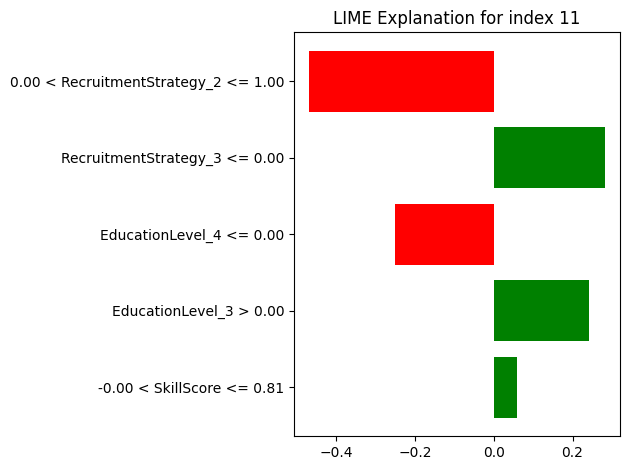


 Explanation for index 12:
  RecruitmentStrategy_2 <= 0.00: 0.470
  RecruitmentStrategy_3 > 0.00: -0.285
  EducationLevel_4 <= 0.00: -0.238
  EducationLevel_3 > 0.00: 0.235
  InterviewScore > 0.81: 0.128


c:\Users\alska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


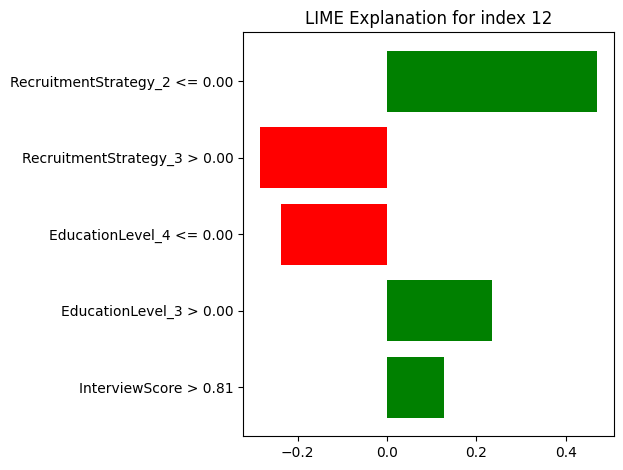


 Explanation for index 2:
  0.00 < RecruitmentStrategy_2 <= 1.00: -0.468
  RecruitmentStrategy_3 <= 0.00: 0.268
  EducationLevel_3 <= 0.00: -0.235
  EducationLevel_4 <= 0.00: -0.231
  ExperienceYears <= -0.80: -0.118


c:\Users\alska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


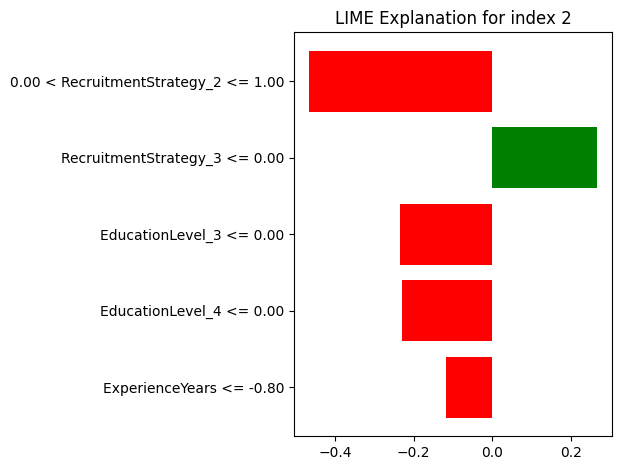

c:\Users\alska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



 Explanation for index 4:
  0.00 < RecruitmentStrategy_2 <= 1.00: -0.463
  RecruitmentStrategy_3 <= 0.00: 0.277
  EducationLevel_3 <= 0.00: -0.235
  EducationLevel_4 <= 0.00: -0.233
  InterviewScore <= -0.89: -0.104


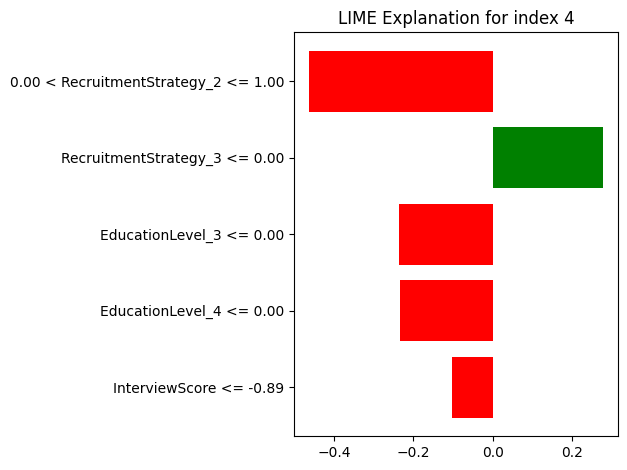

In [21]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No-Hire', 'Hire'],
    mode='classification'
)

hire_indices = test_df[test_df['y_pred'] == 1].index[:3]
nohire_indices = test_df[test_df['y_pred'] == 0].index[:2]

explain_indices = list(hire_indices) + list(nohire_indices)

import matplotlib.pyplot as plt

for idx in explain_indices:
    exp = explainer.explain_instance(
        data_row=X_test.loc[idx].values,
        predict_fn=model.predict_proba,
        num_features=5
    )
    
    print(f"\n Explanation for index {idx}:")
    for feature, weight in exp.as_list():
        print(f"  {feature}: {weight:.3f}")
    
    # Optional: Visualize with matplotlib
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for index {idx}")
    plt.tight_layout()
    plt.show()

In [23]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [26]:

train_data = X_train.copy()
train_data['Label'] = y_train
train_data['Gender'] = train_df['Gender']  

aif_train = BinaryLabelDataset(
    df=train_data,
    label_names=['Label'],
    protected_attribute_names=['Gender'],
    favorable_label=1,
    unfavorable_label=0
)

In [28]:
rw = Reweighing(unprivileged_groups=[{'Gender': 0}], privileged_groups=[{'Gender': 1}])
rw.fit(aif_train)
aif_train_transf = rw.transform(aif_train)

X_train_rw = aif_train_transf.features
y_train_rw = aif_train_transf.labels.ravel()
sample_weights = aif_train_transf.instance_weights

In [30]:
model_rw = LogisticRegression()
model_rw.fit(X_train_rw, y_train_rw, sample_weight=sample_weights)

y_pred_rw = model_rw.predict(X_test)

c:\Users\alska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [32]:
print("Accuracy after reweighing:", accuracy_score(y_test, y_pred_rw))
print(classification_report(y_test, y_pred_rw))

Accuracy after reweighing: 0.8693931398416886
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       518
           1       0.80      0.78      0.79       240

    accuracy                           0.87       758
   macro avg       0.85      0.85      0.85       758
weighted avg       0.87      0.87      0.87       758



In [34]:
test_df['y_pred_rw'] = y_pred_rw

male = test_df[test_df['Gender'] == 1]
female = test_df[test_df['Gender'] == 0]

def metrics_for_group(group, pred_col):
    tn, fp, fn, tp = confusion_matrix(group['y_true'], group[pred_col]).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    pp = (tp + fp) / len(group)
    return tpr, fpr, pp

tpr_m, fpr_m, pp_m = metrics_for_group(male, 'y_pred_rw')
tpr_f, fpr_f, pp_f = metrics_for_group(female, 'y_pred_rw')

print("After Reweighing")
print(f"Demographic Parity: {pp_m:.3f} vs {pp_f:.3f}")
print(f"Equal Opportunity: {tpr_m:.3f} vs {tpr_f:.3f}")
print(f"Average Odds Difference: {(abs(tpr_m - tpr_f) + abs(fpr_m - fpr_f)) / 2:.3f}")

After Reweighing
Demographic Parity: 0.297 vs 0.310
Equal Opportunity: 0.804 vs 0.773
Average Odds Difference: 0.028
